In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_boston
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
bos=load_boston()
print(bos)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [7]:

df_x=pd.DataFrame(bos.data,columns=bos.feature_names)
df_y=pd.DataFrame(bos.target)
df=pd.concat([df_x, df_y], axis=1, join='inner')
df.shape

(506, 14)

In [8]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
print(bos.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
0          0
dtype: int64

<AxesSubplot:>

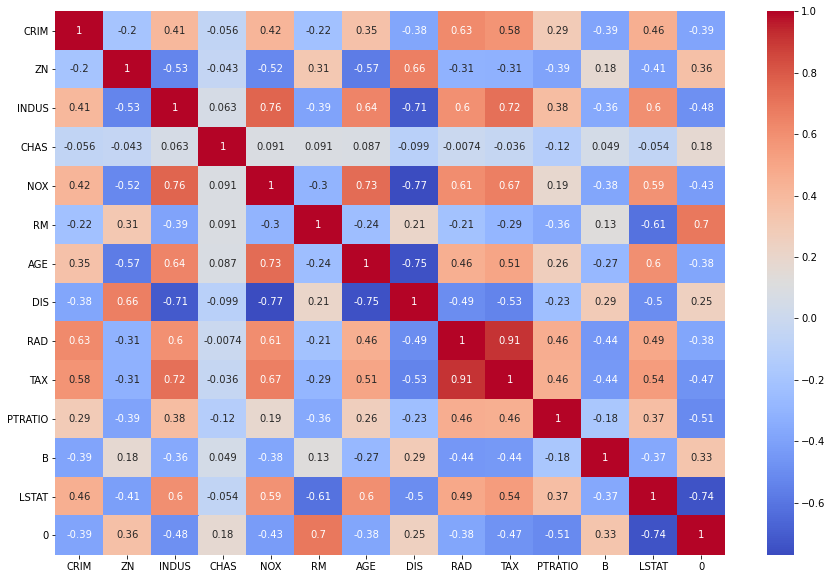

In [11]:
c=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(c,annot=True,cmap="coolwarm")

In [21]:
y=df[0]
x=df.drop([0,"RAD"],axis=1)


<AxesSubplot:xlabel='RM', ylabel='0'>

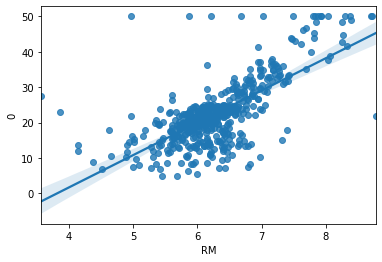

In [22]:
sns.regplot(y=df[0],x=df["RM"])

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, x, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=42)
    model.fit(x_train, y_train)
    
    
    # predict the training set
    pred = model.predict(x_test)
   
    
    # perform cross-validation
    cv_score = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

Model Report
MSE: 22.33901381500689
CV Score: 35.58136621076921
NOX       -14.171115
DIS        -1.395239
PTRATIO    -0.839639
LSTAT      -0.539176
CRIM       -0.090496
AGE        -0.017032
TAX         0.002050
INDUS       0.002499
B           0.011106
ZN          0.029249
CHAS        3.655717
RM          4.122758
dtype: float64


<AxesSubplot:title={'center':'Model Coefficients'}>

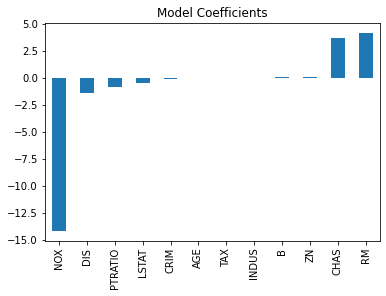

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
print(coef)
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 18.341616766467066
CV Score: 41.957899437002524
LSTAT      0.585064
RM         0.216121
DIS        0.094602
CRIM       0.030036
NOX        0.027795
B          0.015238
PTRATIO    0.010902
INDUS      0.007747
AGE        0.006185
TAX        0.005288
ZN         0.000595
CHAS       0.000426
dtype: float64


<AxesSubplot:title={'center':'Feature Importance'}>

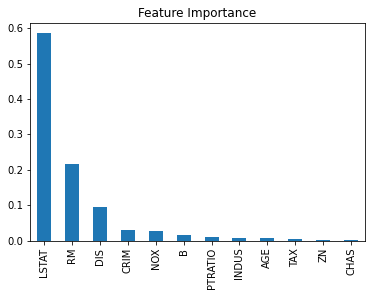

In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
print(coef)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 10.174840766467064
CV Score: 22.101348010347497
LSTAT      0.444704
RM         0.374993
DIS        0.059125
CRIM       0.035874
PTRATIO    0.017736
AGE        0.015410
B          0.014166
TAX        0.013510
NOX        0.013318
INDUS      0.006539
ZN         0.003179
CHAS       0.001446
dtype: float64


<AxesSubplot:title={'center':'Feature Importance'}>

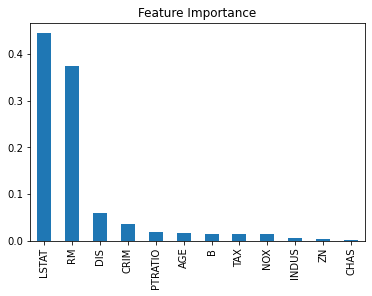

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
print(coef)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 9.928060491017963
CV Score: 20.49947939524363
LSTAT      0.375970
RM         0.326071
TAX        0.052624
PTRATIO    0.049345
INDUS      0.040376
NOX        0.036107
CRIM       0.030956
DIS        0.022841
B          0.021601
CHAS       0.021367
AGE        0.017414
ZN         0.005328
dtype: float64


<AxesSubplot:title={'center':'Feature Importance'}>

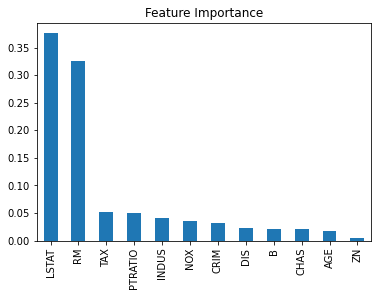

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
print(coef)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 9.099189995994912
CV Score: 18.76590025721172


<AxesSubplot:title={'center':'Feature Importance'}>

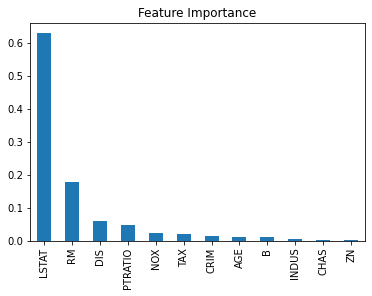

In [79]:
from xgboost import XGBRegressor

model = XGBRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')